In [ ]:
import pandas as pd
#import pyspark as spark
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import cosine_similarity
#import seaborn as sns
#sc = spark.SparkContext()
#sql = spark.SQLContext(sc)
#from pyspark.sql.types import *
#from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from elephas.utils.rdd_utils import to_simple_rdd

In [ ]:
df = pd.read_csv('BTC-USD.csv')
df.columns = ['Date','Open','High','Low','Close','Adj CLose','Volume']
print(df.shape)
df.head()


(799, 7)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Checking for any null value in df
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj CLose    0
Volume       0
dtype: int64

In [ ]:
dayRange = 10 # for short term prediction, 

rows_list = []
for i in range(dayRange, df.shape[0]):   # for i from 10 to (len(rows of df)-1)
    dict1 = {}

    close_values_list = df['Close'].iloc[i-dayRange:i].tolist() #e.g. i=0, range of index of data included is 0 to 9
    data_dict = {}
    for j, data in enumerate(close_values_list, start=1):
        key = f'close_{j}'
        data_dict[key] = data
    datarow = {'start_date': df['Date'].iloc[i-dayRange], 'end_date': df['Date'].iloc[i-1]}
    
    dict1.update(datarow)
    dict1.update(data_dict)
    dict1.update({'close_nextday': df['Close'].iloc[i]})

    rows_list.append(dict1)

df_tenDay_close = pd.DataFrame(rows_list, columns=['start_date', 'end_date', 'close_1', 'close_2', 'close_3', 'close_4', 'close_5', 'close_6', 'close_7', 'close_8', 'close_9', 'close_10', 'close_nextday'])    
df_tenDay_close.tail(20)

#print(df_tenDay_close.shape)  # (789, 13)

(789, 13)


In [ ]:
# exponential moving average prioritizes the most current data points


In [ ]:
### dataset from 2021-9-2 to 2023-12-19, extra front 40 days for calculating 50-day average
df_extra40 = pd.read_csv('BTC-USD-2.csv')
df_extra40.columns = ['Date','Open','High','Low','Close','Adj CLose','Volume']
print(df_extra40.shape)

df_extra40['Date'] = pd.to_datetime(df_extra40['Date'], format='%Y-%m-%d')

#Checking for any null value in df
df_extra40.isnull().sum()

(839, 7)


Date         0
Open         0
High         0
Low          0
Close        0
Adj CLose    0
Volume       0
dtype: int64

In [ ]:
df_extra40.head()

,Date,Open,High,Low,Close,Adj CLose,Volume
0,2021-09-02,48807.847656,50343.421875,48652.320313,49327.722656,49327.722656,39508070319
1,2021-09-03,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,43206179619
2,2021-09-04,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,37471327794
3,2021-09-05,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319
4,2021-09-06,51769.003906,52700.941406,51053.679688,52633.535156,52633.535156,38884105426


In [ ]:
close_10_col = ['close_1', 'close_2', 'close_3', 'close_4', 'close_5', 'close_6', 'close_7', 'close_8', 'close_9', 'close_10']
df_tenDay_close['10DayAve'] = df_tenDay_close[close_10_col].mean(axis=1)
df_tenDay_close.head()

,start_date,end_date,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,close_nextday,10DayAve
0,2021-10-12,2021-10-21,56041.058594,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,60929.450391
1,2021-10-13,2021-10-22,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,61394.571094
2,2021-10-14,2021-10-23,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,61793.823047
3,2021-10-15,2021-10-24,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,62154.754297
4,2021-10-16,2021-10-25,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,60363.792969,62299.341797


In [ ]:
longerTermAve_dayRange = 50
longerTerm_ave_list = []
for i in range(longerTermAve_dayRange, df_extra40.shape[0]):   # for i from 10 to (len(rows of df_extra40)-1)

    values = df_extra40['Close'].iloc[ i-longerTermAve_dayRange : i ] #e.g. i=0, range of index of data included is 0 to 49
    mean_value = values.mean()

    longerTerm_ave_list.append(mean_value)

df_tenDay_close['50DayAve'] = longerTerm_ave_list
df_tenDay_close.tail()

,start_date,end_date,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,close_nextday,10DayAve,50DayAve
784,2023-12-05,2023-12-14,44080.648438,43746.445313,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,41929.757813,43140.081250,37905.479531
785,2023-12-06,2023-12-15,43746.445313,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,41929.757813,42240.117188,42924.992188,38060.941719
786,2023-12-07,2023-12-16,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,41929.757813,42240.117188,41364.664063,42774.359375,38227.548047
787,2023-12-08,2023-12-17,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,41929.757813,42240.117188,41364.664063,42623.539063,42581.559375,38373.049844
788,2023-12-09,2023-12-18,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,41929.757813,42240.117188,41364.664063,42623.539063,42270.527344,42427.253125,38534.751016


In [ ]:
# if shorter-term moving average is > longer-term, it might suggest an uptrend, and if it's below, it might indicate a downtrend
# 1:uptrend, -1:downtrend, 0:sideways
df_tenDay_close['Trend'] = df_tenDay_close.apply(lambda row: 1 if row['10DayAve'] > row['50DayAve'] 
                                     else -1 if row['10DayAve'] < row['50DayAve'] 
                                     else 0, axis=1)

# Calculating standard deviation of the 10 day period's closing price, as a measure of volatility
df_tenDay_close['Std_Dev'] = df_tenDay_close[close_10_col].apply(lambda row: row.std(), axis=1)

df_tenDay_close.head()

,start_date,end_date,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,close_nextday,10DayAve,50DayAve,Trend,Std_Dev
0,2021-10-12,2021-10-21,56041.058594,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,60929.450391,50273.131797,1,3158.443080
1,2021-10-13,2021-10-22,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,61394.571094,50500.422656,1,2662.045449
2,2021-10-14,2021-10-23,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,61793.823047,50727.787500,1,2266.581453
3,2021-10-15,2021-10-24,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,62154.754297,50947.511719,1,1689.085638
4,2021-10-16,2021-10-25,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,60363.792969,62299.341797,51173.240000,1,1697.608894


In [ ]:
# this cell and cell below for calculating RSI
df_extra4_close = df_extra40[['Date', 'Close']].iloc[35:].reset_index(drop=True)
df_extra4_close.head(10)
#print(df_extra4.shape)

df_extra4_close['Change'] = df_extra4_close['Close'].diff()

df_extra4_close = df_extra4_close.iloc[1:].reset_index(drop=True)

df_extra4_close.head(20)

,Date,Close,Change
0,2021-10-08,53967.847656,161.863281
1,2021-10-09,54968.222656,1000.375000
2,2021-10-10,54771.578125,-196.644531
3,2021-10-11,57484.789063,2713.210938
4,2021-10-12,56041.058594,-1443.730469
5,2021-10-13,57401.097656,1360.039062
6,2021-10-14,57321.523438,-79.574218
7,2021-10-15,61593.949219,4272.425781
8,2021-10-16,60892.179688,-701.769531
9,2021-10-17,61553.617188,661.437500


In [ ]:
dayRange = 14
mean_gain_list = []
mean_loss_list = []
for i in range(dayRange, df_extra4_close.shape[0]+1):   # for i from 14 to (len(rows of df_extra4_close))
    gain_values = df_extra4_close['Change'].iloc[ i-dayRange : i ] #e.g. i=0, range of index of data included is 0 to 13
    loss_values = df_extra4_close['Change'].iloc[ i-dayRange : i ]
    # Filter out gain and loss values
    gain_values = gain_values[gain_values >= 0]
    loss_values = loss_values[loss_values < 0]

    mean_gain = gain_values.sum()/dayRange
    mean_loss = abs(loss_values.sum())/dayRange

    mean_gain_list.append(mean_gain)
    mean_loss_list.append(mean_loss)

# the first 13 days will not have Ave value calculated
df_extra4_close['Ave Gain'] = [None] * 13 + mean_gain_list
df_extra4_close['Ave Loss'] = [None] * 13 + mean_loss_list

df_extra4_close['RS'] = df_extra4_close['Ave Gain']/df_extra4_close['Ave Loss']

df_extra4_close['RSI'] = df_extra4_close['RS'].apply(lambda rs_value: 100 if rs_value == 0 else 100 - (100 / (1 + rs_value)))

df_extra4_close.head(20)

# reference for RSI: 
# https://school.stockcharts.com/doku.php?id=technical_indicators:relative_strength_index_rsi
# https://www.investopedia.com/terms/r/rsi.asp

,Date,Close,Change,Ave Gain,Ave Loss,RS,RSI
0,2021-10-08,53967.847656,161.863281,NaN,NaN,NaN,NaN
1,2021-10-09,54968.222656,1000.375000,NaN,NaN,NaN,NaN
2,2021-10-10,54771.578125,-196.644531,NaN,NaN,NaN,NaN
3,2021-10-11,57484.789063,2713.210938,NaN,NaN,NaN,NaN
4,2021-10-12,56041.058594,-1443.730469,NaN,NaN,NaN,NaN
5,2021-10-13,57401.097656,1360.039062,NaN,NaN,NaN,NaN
6,2021-10-14,57321.523438,-79.574218,NaN,NaN,NaN,NaN
7,2021-10-15,61593.949219,4272.425781,NaN,NaN,NaN,NaN
8,2021-10-16,60892.179688,-701.769531,NaN,NaN,NaN,NaN
9,2021-10-17,61553.617188,661.437500,NaN,NaN,NaN,NaN


In [ ]:
# Combining RSI column with df_tenDay_close
df_tenDay_close_metrics = df_tenDay_close.merge(df_extra4_close[['Date', 'RSI']], left_on='end_date', right_on='Date', how='left')
# to drop the extra Date column from df_extra4_close
df_tenDay_close_metrics.drop('Date', axis=1, inplace=True)
df_tenDay_close_metrics.head(20)

,start_date,end_date,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,close_nextday,10DayAve,50DayAve,Trend,Std_Dev,RSI
0,2021-10-12,2021-10-21,56041.058594,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,60929.450391,50273.131797,1,3158.443080,70.189801
1,2021-10-13,2021-10-22,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,61394.571094,50500.422656,1,2662.045449,65.166266
2,2021-10-14,2021-10-23,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,61793.823047,50727.787500,1,2266.581453,64.689992
3,2021-10-15,2021-10-24,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,62154.754297,50947.511719,1,1689.085638,63.912241
4,2021-10-16,2021-10-25,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,60363.792969,62299.341797,51173.240000,1,1697.608894,62.899555
5,2021-10-17,2021-10-26,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,60363.792969,58482.386719,62246.503125,51327.845156,1,1753.574395,59.494594
6,2021-10-18,2021-10-27,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,60363.792969,58482.386719,60622.136719,61939.380078,51561.270313,1,2119.235821,52.321802
7,2021-10-19,2021-10-28,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,60363.792969,58482.386719,60622.136719,62227.964844,61798.985938,51851.885234,1,2158.985167,56.511182
8,2021-10-20,2021-10-29,65992.835938,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,60363.792969,58482.386719,60622.136719,62227.964844,61888.832031,61595.583203,52168.616094,1,1990.389379,51.397795
9,2021-10-21,2021-10-30,62210.171875,60692.265625,61393.617188,60930.835938,63039.824219,60363.792969,58482.386719,60622.136719,62227.964844,61888.832031,61318.957031,61185.182813,52508.714531,1,1278.920004,52.232995


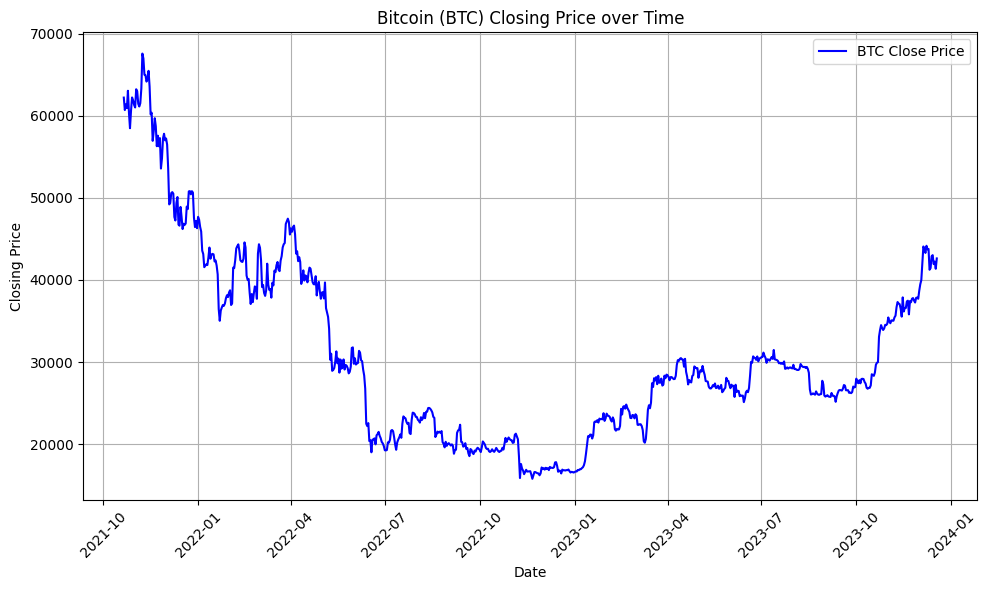

In [ ]:
# Visualise BTC Closing Price and RSI over Time
plt.figure(figsize=(10, 6))
plt.plot(df_tenDay_close_metrics['end_date'], df_tenDay_close_metrics['close_10'], color='blue', linewidth=1.5, label='BTC Close Price')
plt.title('Bitcoin (BTC) Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

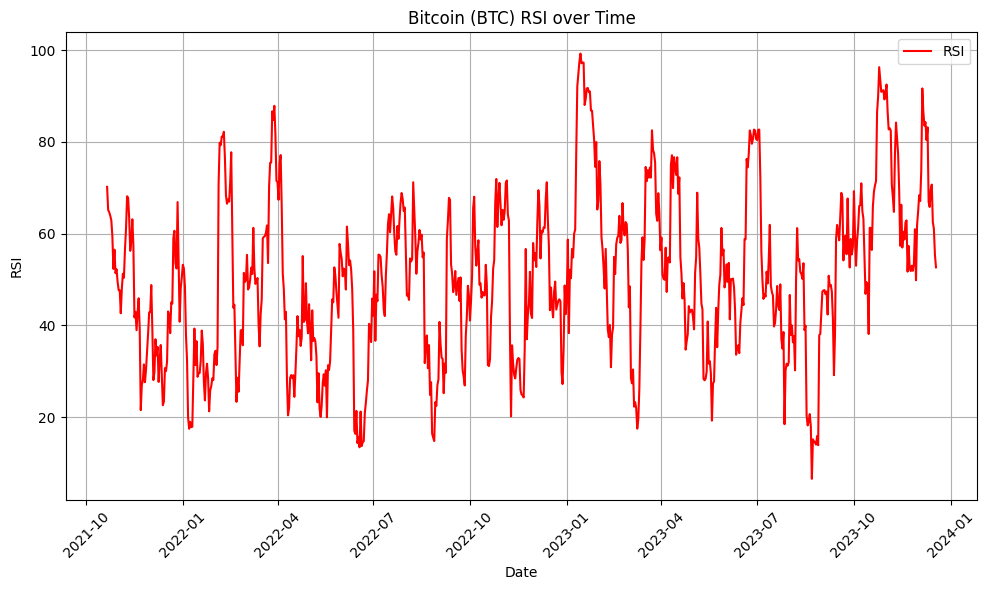

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_tenDay_close_metrics['end_date'], df_tenDay_close_metrics['RSI'], color='red', linewidth=1.5, label='RSI')
plt.title('Bitcoin (BTC) RSI over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Reversal indicators
# Identify divergences between RSI and price movements
def identify_divergences(data):
    data['DivergenceOnDay10'] = 0  
    for i in range(1, len(data)):
        if (data['close_10'][i] > data['close_10'][i-1] and data['RSI'][i] < data['RSI'][i-1]) or \
           (data['close_10'][i] < data['close_10'][i-1] and data['RSI'][i] > data['RSI'][i-1]):
            data.at[data.index[i], 'DivergenceOnDay10'] = 1  # Set to 1 if a divergence is indicated
    return data

# Identify RSI crossing overbought/oversold levels
def identify_overbought_oversold(data, overbought_level=70, oversold_level=30):
    data['Overbought/OversoldOnDay10'] = 0 
    for i in range(1, len(data)):
        if data['RSI'][i-1] < overbought_level and data['RSI'][i] >= overbought_level:
            data.at[data.index[i], 'Overbought/OversoldOnDay10'] = 1    # 'Overbought' 
        elif data['RSI'][i-1] > oversold_level and data['RSI'][i] <= oversold_level:
            data.at[data.index[i], 'Overbought/OversoldOnDay10'] = -1    # 'Oversold' 
    return data

df_tenDay_close_metrics = identify_divergences(df_tenDay_close_metrics)
df_tenDay_close_metrics = identify_overbought_oversold(df_tenDay_close_metrics)

df_tenDay_close_metrics.tail(50)

,start_date,end_date,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,close_nextday,10DayAve,50DayAve,Trend,Std_Dev,RSI,DivergenceOnDay10,Overbought/OversoldOnDay10
739,2023-10-21,2023-10-30,29918.412109,29993.896484,33086.234375,33901.527344,34502.820313,34156.648438,33909.800781,34089.574219,34538.480469,34502.363281,34667.781250,33259.975781,28361.811641,1,1792.341351,89.240240,0,0
740,2023-10-22,2023-10-31,29993.896484,33086.234375,33901.527344,34502.820313,34156.648438,33909.800781,34089.574219,34538.480469,34502.363281,34667.781250,35437.253906,33734.912695,28551.914180,1,1393.341523,90.676228,0,0
741,2023-10-23,2023-11-01,33086.234375,33901.527344,34502.820313,34156.648438,33909.800781,34089.574219,34538.480469,34502.363281,34667.781250,35437.253906,34938.242188,34279.248438,28743.992383,1,615.751997,92.480904,0,0
742,2023-10-24,2023-11-02,33901.527344,34502.820313,34156.648438,33909.800781,34089.574219,34538.480469,34502.363281,34667.781250,35437.253906,34938.242188,34732.324219,34464.449219,28918.190742,1,480.780801,86.688094,0,0
743,2023-10-25,2023-11-03,34502.820313,34156.648438,33909.800781,34089.574219,34538.480469,34502.363281,34667.781250,35437.253906,34938.242188,34732.324219,35082.195313,34547.528906,29082.043750,1,442.995516,82.713767,0,0
744,2023-10-26,2023-11-04,34156.648438,33909.800781,34089.574219,34538.480469,34502.363281,34667.781250,35437.253906,34938.242188,34732.324219,35082.195313,35049.355469,34605.466406,29251.513789,1,473.345893,82.966283,0,0
745,2023-10-27,2023-11-05,33909.800781,34089.574219,34538.480469,34502.363281,34667.781250,35437.253906,34938.242188,34732.324219,35082.195313,35049.355469,35037.371094,34694.737109,29421.135274,1,463.371025,82.451424,0,0
746,2023-10-28,2023-11-06,34089.574219,34538.480469,34502.363281,34667.781250,35437.253906,34938.242188,34732.324219,35082.195313,35049.355469,35037.371094,35443.562500,34807.494141,29591.198945,1,381.014127,70.717463,0,0
747,2023-10-29,2023-11-07,34538.480469,34502.363281,34667.781250,35437.253906,34938.242188,34732.324219,35082.195313,35049.355469,35037.371094,35443.562500,35655.277344,34942.892969,29764.984570,1,335.392208,67.931407,1,0
748,2023-10-30,2023-11-08,34502.363281,34667.781250,35437.253906,34938.242188,34732.324219,35082.195313,35049.355469,35037.371094,35443.562500,35655.277344,36693.125000,35054.572656,29933.867774,1,369.926404,64.736404,1,0


In [ ]:
# Adding next day's closing price indicator - 1:increased, 0:same, -1:decreased

df_tenDay_close_metrics['close_nextday_indicator'] = df_tenDay_close_metrics.apply(lambda row: 1 if row['close_nextday'] > row['close_10'] 
                                     else -1 if row['close_nextday'] < row['close_10'] 
                                     else 0, axis=1)

display(df_tenDay_close_metrics)

,start_date,end_date,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,...,close_10,close_nextday,10DayAve,50DayAve,Trend,Std_Dev,RSI,DivergenceOnDay10,Overbought/OversoldOnDay10,close_nextday_indicator
0,2021-10-12,2021-10-21,56041.058594,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,...,62210.171875,60692.265625,60929.450391,50273.131797,1,3158.443080,70.189801,0,0,-1
1,2021-10-13,2021-10-22,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,...,60692.265625,61393.617188,61394.571094,50500.422656,1,2662.045449,65.166266,0,0,1
2,2021-10-14,2021-10-23,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,...,61393.617188,60930.835938,61793.823047,50727.787500,1,2266.581453,64.689992,1,0,-1
3,2021-10-15,2021-10-24,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,...,60930.835938,63039.824219,62154.754297,50947.511719,1,1689.085638,63.912241,0,0,1
4,2021-10-16,2021-10-25,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,...,63039.824219,60363.792969,62299.341797,51173.240000,1,1697.608894,62.899555,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2023-12-05,2023-12-14,44080.648438,43746.445313,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,...,43023.972656,41929.757813,43140.081250,37905.479531,1,1033.268678,70.682082,0,1,-1
785,2023-12-06,2023-12-15,43746.445313,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,...,41929.757813,42240.117188,42924.992188,38060.941719,1,1039.571524,62.505456,0,0,1
786,2023-12-07,2023-12-16,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,...,42240.117188,41364.664063,42774.359375,38227.548047,1,1016.188230,61.071835,1,0,-1
787,2023-12-08,2023-12-17,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,41929.757813,...,41364.664063,42623.539063,42581.559375,38373.049844,1,1087.332587,55.392152,0,0,1


In [ ]:
from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Select columns for clustering
columns_for_clustering = ['Trend', 'Std_Dev', 'RSI', 'DivergenceOnDay10', 'Overbought/OversoldOnDay10']

X = df_tenDay_close_metrics[columns_for_clustering]

# Preprocess the data
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Range of number of clusters to try
min_clusters = 2
max_clusters = 10

silhouette_scores = []

# for the different number of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(X_scaled)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Find the number of clusters that maximizes the silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters   # index in silhouette_scores + 2

print("Optimal number of clusters:", optimal_num_clusters)
print("Silhouette scores for different numbers of clusters:", silhouette_scores)


Optimal number of clusters: 4
Silhouette scores for different numbers of clusters: [0.5028455029359766, 0.5973057370408629, 0.6746923733415209, 0.5911032441736418, 0.5046098124049708, 0.47982792241887406, 0.4453049646470832, 0.4729525761889499, 0.44252978052067476]


In [ ]:
# Using the optimal no. of clusters
n_clusters = 4

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to df
df_tenDay_close_metrics['Cluster'] = cluster_labels

display(df_tenDay_close_metrics)

,start_date,end_date,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,...,close_nextday,10DayAve,50DayAve,Trend,Std_Dev,RSI,DivergenceOnDay10,Overbought/OversoldOnDay10,close_nextday_indicator,Cluster
0,2021-10-12,2021-10-21,56041.058594,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,...,60692.265625,60929.450391,50273.131797,1,3158.443080,70.189801,0,0,-1,1
1,2021-10-13,2021-10-22,57401.097656,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,...,61393.617188,61394.571094,50500.422656,1,2662.045449,65.166266,0,0,1,1
2,2021-10-14,2021-10-23,57321.523438,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,...,60930.835938,61793.823047,50727.787500,1,2266.581453,64.689992,1,0,-1,2
3,2021-10-15,2021-10-24,61593.949219,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,...,63039.824219,62154.754297,50947.511719,1,1689.085638,63.912241,0,0,1,1
4,2021-10-16,2021-10-25,60892.179688,61553.617188,62026.078125,64261.992188,65992.835938,62210.171875,60692.265625,61393.617188,...,60363.792969,62299.341797,51173.240000,1,1697.608894,62.899555,1,0,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2023-12-05,2023-12-14,44080.648438,43746.445313,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,...,41929.757813,43140.081250,37905.479531,1,1033.268678,70.682082,0,1,-1,1
785,2023-12-06,2023-12-15,43746.445313,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,...,42240.117188,42924.992188,38060.941719,1,1039.571524,62.505456,0,0,1,1
786,2023-12-07,2023-12-16,43292.664063,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,...,41364.664063,42774.359375,38227.548047,1,1016.188230,61.071835,1,0,-1,2
787,2023-12-08,2023-12-17,44166.601563,43725.984375,43779.699219,41243.832031,41450.222656,42890.742188,43023.972656,41929.757813,...,42623.539063,42581.559375,38373.049844,1,1087.332587,55.392152,0,0,1,1


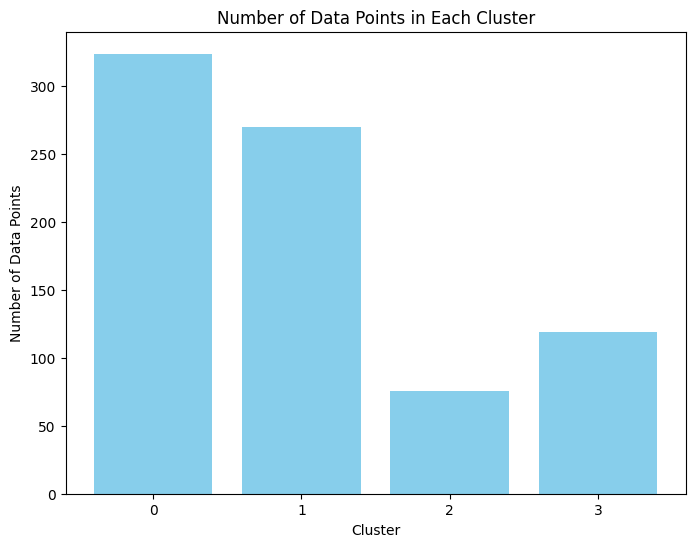

In [ ]:
# no. of data points in each cluster
cluster_counts = df_tenDay_close_metrics['Cluster'].value_counts().sort_index()

# visualise the no. of data points in each cluster
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84adc6f1-a70e-4d8d-9cc6-0672f4fd6bc6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>